# Шаг 5.1

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:

* Выберите метод, который предположительно подойдет в первом вопросе.
* Проверьте, являются ли дисперсии внутри групп гомогенными.
* Проведите тест на нормальность распределения.
* Сравните средние в представленных группах.
* Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
* Примите решение: какие картинки в итоге будем использовать?
* Выберите метод для второго теста.
* Визуализируйте распределение events для контрольной и тестовой групп. 
* Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
* - 11.Выберите формулу для модели, проведите тест.

Описание данных

* 5_task_1:
    * id – id клиента в эксперименте
    * group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
    * events – сколько блюд суммарно было заказано за период

* 5_task_2:
    * id – id клиента в эксперименте
    * segment – сегмент (high/low)
    * group – вид кнопки (control – старая версия, test – новая версия)
    * events – сколько блюд суммарно было заказано за период

# Шаг 5.2

Задание 1

Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

* A – прямоугольные 16:9
* B – квадратные
* C – прямоугольные 12:4

Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

* ANOVA
* сделаю вывод исключительно по графику
* посчитаю хи-квадрат
* t-test

Ответ: ANOVA

# Шаг 5.3

Задание 2

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene либо pingouin.homoscedasticity

Варианты: 
* p-value < 0.05, не отклоняем нулевую гипотезу
* p-value > 0.05, не отклоняем нулевую гипотезу
* p-value > 0.05, отклоняем нулевую гипотезу
* p-value < 0.05, отклоняем нулевую гипотезу

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('5_task_1.csv')

In [5]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
df1.shape

(30000, 3)

In [23]:
# Нулевая гиппотеза - дисперсии гомогенны. Соответственно, альтернативная гипотеза - дисперсии гетерогенны (различаются).

In [18]:
df1A = df1.query('group == "A"').events
df1B = df1.query('group == "B"').events
df1C = df1.query('group == "C"').events

In [19]:
ss.levene(df1A, df1B, df1C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [24]:
pg.normality(data=df1, dv="events", group="group", method="normaltest")

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


Ответ: p-value > 0.05, не отклоняем нулевую гипотезу

# Шаг 5.4

Задание 3

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода sample. Сравните  результат с normaltest, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

Выберите верные утверждения:

* Все утверждения не верны
* Распределение events в группе С является нормальным
* Распределение events в группе A является нормальным
* Распределение events в группе B является нормальным

In [26]:
df1A_s = df1A.sample(1000, random_state=17)
df1B_s = df1B.sample(1000, random_state=17)
df1C_s = df1C.sample(1000, random_state=17)

In [36]:
# Сначала проанализируем группу А (df1A и  df1A_s)

In [34]:
ss.shapiro(df1A_s)

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [35]:
ss.shapiro(df1A)

C:\Users\Ihar237\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)

In [27]:
ss.normaltest(df1A_s)

NormaltestResult(statistic=0.6421907772748111, pvalue=0.7253540571548922)

In [30]:
ss.normaltest(df1A)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [ ]:
# Затем проанализируем группу B (df1B и  df1B_s)

In [37]:
ss.shapiro(df1B_s)

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [38]:
ss.shapiro(df1B)

ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)

In [28]:
ss.normaltest(df1B_s)

NormaltestResult(statistic=0.7993452547417171, pvalue=0.6705395263954472)

In [31]:
ss.normaltest(df1B)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [ ]:
# Затем проанализируем группу C (df1C и  df1C_s)

In [39]:
ss.shapiro(df1C_s)

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [40]:
ss.shapiro(df1C)

ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)

In [29]:
ss.normaltest(df1C_s)

NormaltestResult(statistic=1.5761199866762348, pvalue=0.4547261118122219)

In [32]:
ss.normaltest(df1C)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

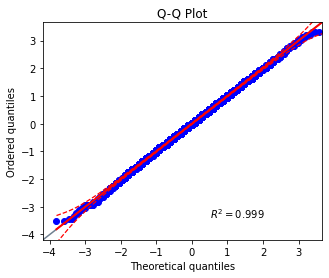

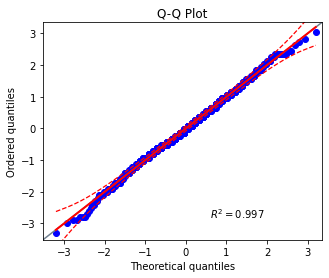

In [42]:
pg.qqplot(df1A)
pg.qqplot(df1A_s)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

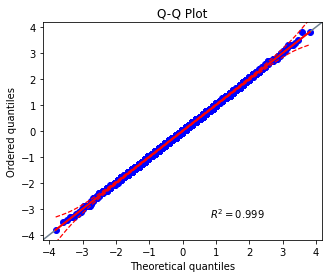

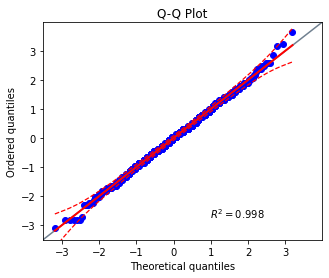

In [43]:
pg.qqplot(df1B)
pg.qqplot(df1B_s)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

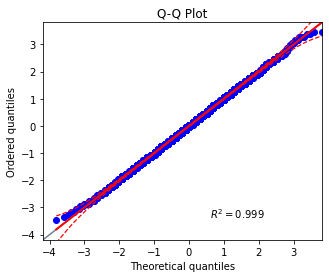

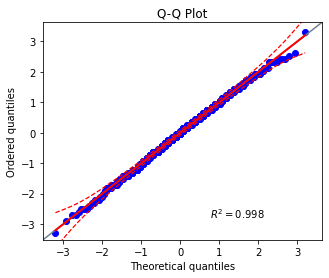

In [44]:
pg.qqplot(df1C)
pg.qqplot(df1C_s)

In [33]:
# Нулевая гиппотеза - распределение нормальное. При отклонениях от нормальности мы её отвергаем.

Ответ:

* Распределение events в группе С является нормальным
* Распределение events в группе A является нормальным
* Распределение events в группе B является нормальным

# Шаг 5.5

Задание 4

Самое время провести тест! 

Для сравнения средних я использую 
ВЫБРАТЬ
. Значение статистики равно (окр. до целого) 
ВЫБРАТЬ
, а р-уровень значимости составил 
ВЫБРАТЬ
.


In [46]:
ss.f_oneway(df1A, df1B, df1C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Ответ: 
    Для сравнения средних я использую 
ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ 
. Значение статистики равно (окр. до целого) 
2886
, а р-уровень значимости составил 
0
.

# Шаг 5.6

Задание 5

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

Варианты:

* A и B
* Нет значимых
* B и C
* A и C

In [53]:
pairwise_tukeyhsd(df1.events, df1.group).summary()

# Смотрим на столбец reject. Если там стоит True - различия значимые.

# Столбец meandiff отражает различие в средних между второй и первой группой, именно в таком порядке.

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,-0.0,7.7038,8.3642,True
A,C,-2.1093,-0.0,-2.4395,-1.7791,True
B,C,-10.1433,-0.0,-10.4735,-9.8131,True


In [48]:
#тьюки

pg.pairwise_tukey(data=df1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


In [50]:
#геймс-хоувелл

pg.pairwise_gameshowell(data=df1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,6.412648e-13,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,6.349254e-12,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.000000e+00,1.024138


In [51]:
#попарные сравнения без поправки
pg.pairwise_ttests(data=df1, dv="events", between="group")

C:\Users\Ihar237\anaconda3\lib\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,inf,1.024138


In [52]:
#с поправкой Бонферрони
pg.pairwise_ttests(data=df1, dv="events", between="group", padjust="holm")

C:\Users\Ihar237\anaconda3\lib\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,7.500262e-50,holm,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,1.024138


# Шаг 5.7

Задание 6

Так какие картинки в итоге будем использовать?

* B – Квадратные
* C – Прямоугольные, 12:4
* A – Прямоугольные, 16:9
    
Ответ 
* B – Квадратные

# Шаг 5.8

Задание 7

Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

* t-test
* хи-квадрат
* многофакторный дисперсионный анализ
* однофакторный дисперсионный анализ

Ответ: многофакторный дисперсионный анализ

# Шаг 5.9

Задание 8

Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. 

Соотнесите графики распределения и экспериментальные группы:

In [55]:
df2 = pd.read_csv('5_task_2.csv')

In [56]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

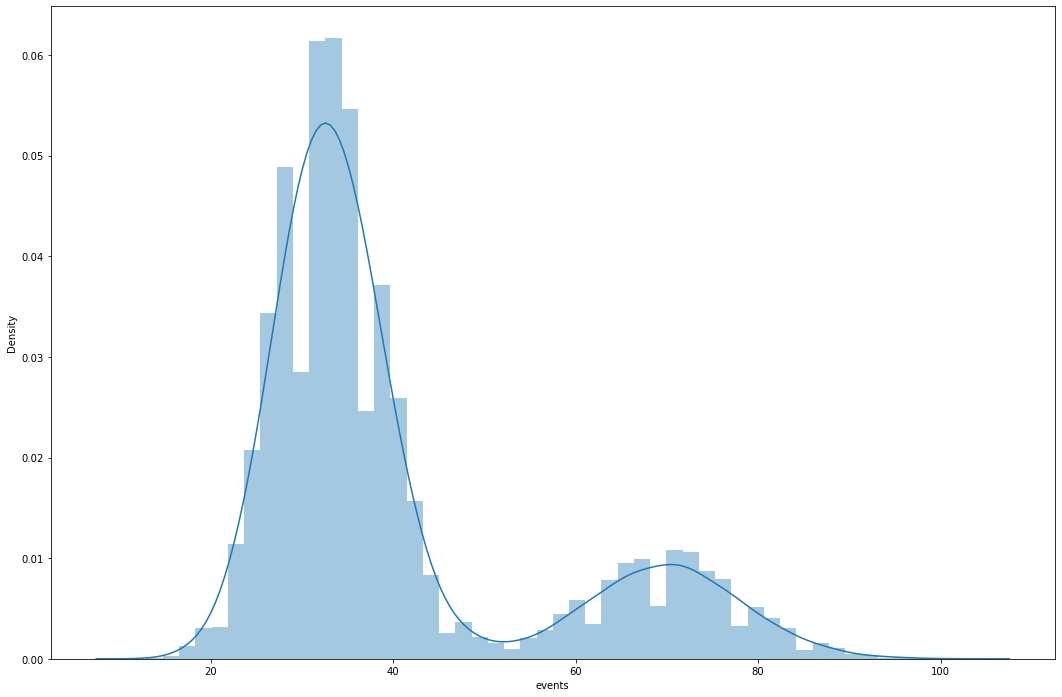

In [59]:
plt.figure(figsize=(18, 12))
sns.distplot(df2.query('group == "test"').events)

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

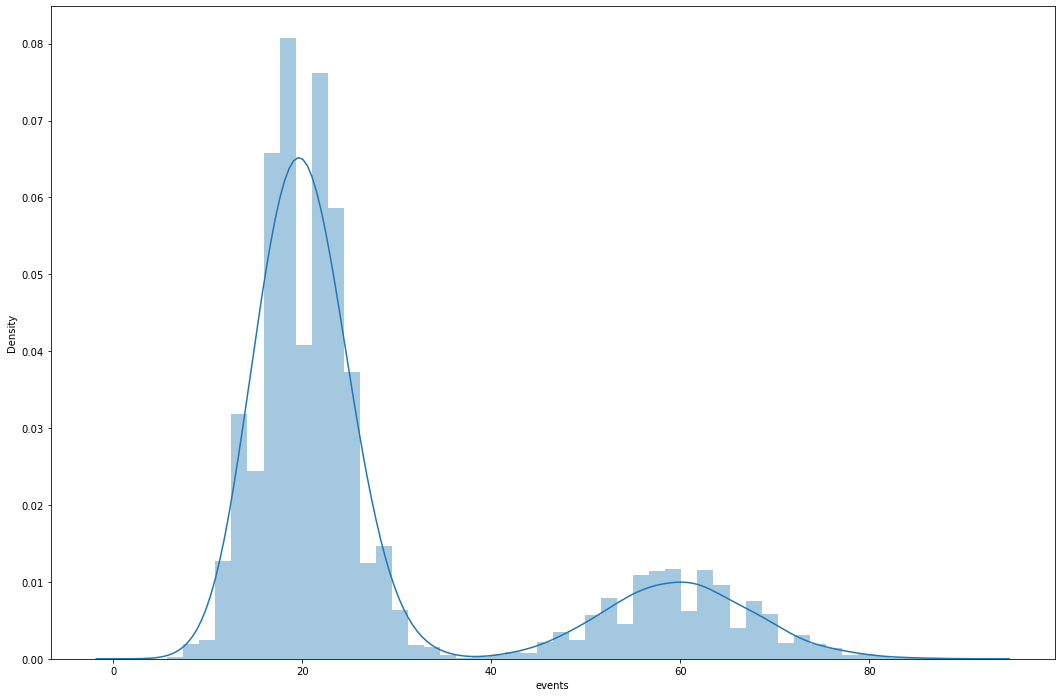

In [60]:
plt.figure(figsize=(18, 12))
sns.distplot(df2.query('group == "control"').events)

# Шаг 5.10

Задание 9

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [63]:
df2.groupby(['group', 'segment']).events.describe() 

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

Ответ: 7.81

# Шаг 5.11

Задание 10

Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

Если вы прибегнете к statsmodels, то какую формулу используете?

Варианты:

* events ~ segment + group
* events ~ segment, group
* events ~ segment + group + segment:group
* events = segment + group + segment:group
* events = segment + group

In [66]:
model = smf.ols(formula = "events ~ segment + group + segment:group", data = df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377485,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


# Шаг 5.12

Задание 11



Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+
Между какими группами были обнаружены статистически значимые различия? 

Выберите верные утверждения:

* Для обоих сегментов показатели статистически значимо _уменьшились_ по сравнению с контрольной группой
* Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 36
* Разница между control/high и test/high составила около 10
* Различий совсем не оказалось :(
* Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
* Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

In [67]:
model = smf.ols(formula = "events ~ segment + group + segment:group", data = df2).fit()
anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [69]:
df2['combination'] = df2['group'] + '\\' + df2['segment']

In [70]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high


In [74]:
pairwise_tukeyhsd(df2.events, df2.combination).summary()
    
# - **Как по таблице понять характер различий в средних?**
    
#     Столбец **meandiff** отражает различие в средних между **второй и первой группой, именно в таком порядке.**

group1,group2,meandiff,p-adj,lower,upper,reject
control\high,control\low,-39.9392,-0.0,-40.1073,-39.7711,True
control\high,test\high,9.9677,-0.0,9.7551,10.1803,True
control\high,test\low,-26.9449,-0.0,-27.113,-26.7768,True
control\low,test\high,49.9069,-0.0,49.7388,50.075,True
control\low,test\low,12.9944,-0.0,12.888,13.1007,True
test\high,test\low,-36.9126,-0.0,-37.0807,-36.7445,True


In [73]:
MultiComparison(df2.events, df2.combination).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control\high,control\low,-39.9392,-0.0,-40.1073,-39.7711,True
control\high,test\high,9.9677,-0.0,9.7551,10.1803,True
control\high,test\low,-26.9449,-0.0,-27.113,-26.7768,True
control\low,test\high,49.9069,-0.0,49.7388,50.075,True
control\low,test\low,12.9944,-0.0,12.888,13.1007,True
test\high,test\low,-36.9126,-0.0,-37.0807,-36.7445,True


Ответы

* Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
* Разница между control/high и test/high составила около 10
* Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

# Шаг 5.13

Задание 12

Визуализируйте результаты теста и заполните пропуски:
    
Фактор group оказался 
ВЫБРАТЬ
, фактор segment – 
ВЫБРАТЬ
, их взаимодействие – 
ВЫБРАТЬ
. Судя по графику, для всех групп среднее значение events 
ВЫБРАТЬ
, поэтому решение: 
ВЫБРАТЬ
.

<AxesSubplot:xlabel='group', ylabel='events'>

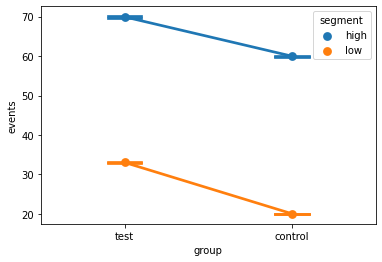

In [78]:
sns.pointplot(x="group", y="events", data=df2, capsize=0.2, hue = "segment")

In [79]:
model = smf.ols(formula = "events ~ segment + C(group) * C(segment)", data = df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377485,0.000000e+00
C(group),1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
C(segment),1.0,8.379195e-02,8.379195e-02,0.002446,9.605518e-01
C(group):C(segment),1.0,3.664316e+04,3.664316e+04,1069.844276,2.038945e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [83]:
model = smf.ols(formula = "events ~ C(group) * C(segment)", data = df2).fit()
anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(group),3.837195e+06,1.0,112031.864119,0.000000e+00
C(segment),2.362480e+07,1.0,689756.377485,0.000000e+00
C(group):C(segment),3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


Фактор group оказался 
ЗНАЧИМЫМ
, фактор segment – 
ЗНАЧИМЫМ
, их взаимодействие – 
ЗНАЧИМО
. Судя по графику, для всех групп среднее значение events 
УВЕЛИЧИЛОСЬ
, поэтому решение: 
ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ
.